# **Final Project - Batch 11**

# **1. Perkenalan**

Final project oleh `Study Group 1`, Batch: `11`

Judul: FashionFinder

Dataset source: Kaggle dataset
- Dataset Produk: 2021June-July_product_data.csv
- Dataset Customer dan rating: /2021June-July_review_data.csv

**Latar Belakang:**
- Perkembangan dunia fashion yang sangat pesat mengakibatkan banyaknya jenis dan model yang tersedia. Selain itu, dari setiap jenis produk tersebut memiliki keberagaman kualitas.
- Hal tersebut mengakibatkan terlalu banyak informasi yang harus diperhatikan dalam memilih suatu produk yang sesuai kebutuhan dengan kualitas yang bagus. 

**Output:**
- Rekomendasi produk yang diberikan berdasarkan rating review yang telah diberikan customer sebelumnya, karena dari informasi tersebut secara implisit telah menggambarkan produk yang disukai atau kurang disukai.
- Produk yang direkomendasikan berupa produk yang memiliki kemiripan  dengan produk yang diberikan rating tinggi oleh customer tersebut.

**Rekomendasi sistem:**
- Rekomendasi sistem yang dibuat merupakan collaborative filtering dimana membuat model yang digunakan untuk melakukan prediksi rating produk yang belum dibeli oleh customer, kemudian dari prediksi tersebut digunakan untuk memberikan rekomendasi 5 barang dengan rating tertinggi ke customer.
- Collabarative filtering mencari kerimiripan antar produk dari hasil cosinus similarity. Jika customer merupakan pengguna baru dan belum memberikan rating, maka rekomendasi yang diberikan berdasarkan kemiripan customer satu dengan customer lainnya.
- Menggunakan User - Based Collaborative Filtering, karena teknik rekomendasi produk yang sering digunakan dalam membuat algoritma machine learning, algoritma ini dapat memberikan rekomendasi yang lebih baik seiring dengan bertambahnya jumlah pembelian dari penggunanya dan metode sistem rekomendasi ini sudah digunakan oleh perusahaan-perusahaan besar seperti Amazon, Netflix, eBay dan perusahaan yang menyimpan data penggunanya

# **2. Import Libraries**

Import libraries yang digunakan dalam pengerjaan final project

In [ ]:
# load data, manipulation, linear algebra
import pandas as pd
import numpy as np
import statsmodels.api as sm
from google.colab import drive

# visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
plt.style.use('fivethirtyeight')
import itertools

# warning igrone
import warnings
warnings.filterwarnings("ignore")

#preprocessing
from sklearn.model_selection import train_test_split

# modeling
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **3.Data Loading**

Dataset yang digunakan disimpan dalam google drive, oleh karena itu sambungkan google drive yang digunakan untuk loading dataset.

In [ ]:
# membaca content dari google drive
drive.mount('/content/gdrive')

# load data produk
cp_df = pd.read_csv('/content/gdrive/MyDrive/Final Project Dataset/2021June-July_product_data.csv')

# load data customer dan rating
cr_df = pd.read_csv('/content/gdrive/MyDrive/Final Project Dataset/2021June-July_review_data.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# tampilkan dataset produk
cp_df.head()

,pk_product,date_collected,product_itemid,product_shopid,product_category,product_name,product_price,product_price_min,product_price_max,product_discount,...,status,shop_location,shop_is_on_flash_sale,shop_is_preferred_plus_seller,feature_lowest_price_guarantee,feature_can_use_bundle_deal,feature_can_use_cod,feature_can_use_wholesale,feature_show_free_shipping,product_variation_count
0,202106137919342724,2021-06-13,7919342724,1083822,Short Sleeves,NKD Korean Fashion Erich Basic Daily Polo Tie ...,300.0,135,138,55,...,1,"Taytay, Rizal",0,0,0,0,0,0,0,20
1,202106137140015494,2021-06-13,7140015494,130651949,Short Sleeves,OnlyYouth Classic knitted blouse korean top sh...,NaN,149,149,0,...,1,"San Nicolas, Metro Manila",0,0,0,0,0,0,0,9
2,202106134843903203,2021-06-13,4843903203,55748694,Short Sleeves,SS Oversized Ringer Top Plus Size Korean Fashi...,200.0,75,75,63,...,1,"Taytay, Rizal",0,0,0,1,0,0,0,14
3,2021061311405348262,2021-06-13,11405348262,396605392,Short Sleeves,Women's T-shirt Short Sleeve Collar with small...,391.0,294,294,25,...,1,Mainland China,0,0,0,1,0,0,0,3
4,202106132553628745,2021-06-13,2553628745,55748694,Short Sleeves,SS Korean Tops Square Neck Fashion Blouse Semi...,300.0,55,55,82,...,1,"Taytay, Rizal",0,0,1,1,0,0,1,10


In [ ]:
# cek info dataset produk
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1583 entries, 0 to 1582
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pk_product                      1583 non-null   int64  
 1   date_collected                  1583 non-null   object 
 2   product_itemid                  1583 non-null   int64  
 3   product_shopid                  1583 non-null   int64  
 4   product_category                1583 non-null   object 
 5   product_name                    1583 non-null   object 
 6   product_price                   1385 non-null   float64
 7   product_price_min               1583 non-null   int64  
 8   product_price_max               1583 non-null   int64  
 9   product_discount                1583 non-null   int64  
 10  product_brand                   1583 non-null   object 
 11  product_like_count              1583 non-null   int64  
 12  product_comment_count           15

In [ ]:
# tampilkan dataset customer dan rating
cr_df.head()

,pk_review,date_collected,cmtid,itemid,shopid,author_username,comment,rating_star,no_tag,pos_good_quality,...,pos_well_packaged,pos_item_shipped_immediately,pos_will_order_again,neg_defective,neg_did_not_receive_item,neg_damaged_packaging,neg_will_not_order_again,neg_rude_seller,neg_item_shipped_late,neg_item_different_from_picture
0,202106134996449880,2021-06-13,4996449880,3550379942,130651949,kaydenshi,it was so good!!!!!!!!! the tela was so nice(´...,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,202106135025745783,2021-06-13,5025745783,3550379942,130651949,a*****0,Ganda ng tela makapal and very comfy🤗😊😊😊😊😊😊😊😊😊...,5,0,0,...,0,1,1,0,0,0,0,0,0,0
2,202106134994515949,2021-06-13,4994515949,3550379942,130651949,s*****a,"Maganda lahat ng napili ko, maganda ang qualit...",5,0,0,...,0,0,0,0,0,0,0,0,0,0
3,202106135006142740,2021-06-13,5006142740,3550379942,130651949,sassynesscruz,Very nice quality. The seller sent a photo bef...,5,0,0,...,0,0,0,0,0,0,0,0,0,0
4,202106134927077288,2021-06-13,4927077288,3550379942,130651949,ukaylovers,"Ok ung tela worth it ang binayad, maganda sya ...",5,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# cek info dataset customer dan rating
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51279 entries, 0 to 51278
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   pk_review                        51279 non-null  int64 
 1   date_collected                   51279 non-null  object
 2   cmtid                            51279 non-null  int64 
 3   itemid                           51279 non-null  int64 
 4   shopid                           51279 non-null  int64 
 5   author_username                  51175 non-null  object
 6   comment                          34255 non-null  object
 7   rating_star                      51279 non-null  int64 
 8   no_tag                           51279 non-null  int64 
 9   pos_good_quality                 51279 non-null  int64 
 10  pos_excellent_quality            51279 non-null  int64 
 11  pos_very_accomodating            51279 non-null  int64 
 12  pos_well_packaged               

Dilakukan perubahan tipe data dari integer menjadi object yang menandakan bahwa pada kolom berikut merupakan kolom kategori dari dataset produk

In [ ]:
# ubah tipe data dari dataset produk
cp_df['feature_show_free_shipping'] = cp_df['feature_show_free_shipping'].astype('object')
cp_df['feature_can_use_wholesale'] = cp_df['feature_can_use_wholesale'].astype('object')
cp_df['feature_can_use_cod'] = cp_df['feature_can_use_cod'].astype('object')
cp_df['feature_can_use_bundle_deal'] = cp_df['feature_can_use_bundle_deal'].astype('object')
cp_df['feature_lowest_price_guarantee'] = cp_df['feature_lowest_price_guarantee'].astype('object')
cp_df['shop_is_on_flash_sale'] = cp_df['shop_is_on_flash_sale'].astype('object')

In [ ]:
#cp_df['product_itemid'] = cp_df['product_itemid'].astype('object')

# **4. Exploratory Data Analysis**

memisahkan kolom yang termasuk dalam numerik dan ketegori untuk memudakan dalam analisa. Dalam EDA ini, dataset yang digunakan adalah *dataset produk*.

In [ ]:
# kolom numerik
num_col = cp_df.select_dtypes(include=np.number).columns.tolist()
# kolom kategori
cat_col = cp_df.select_dtypes(include=['object']).columns.tolist()

## 4.1 *Numerical Feature*

In [ ]:
# menampilkan nilai statistka descriptive di numerik kolom
cp_df.describe()

,pk_product,product_itemid,product_shopid,product_price,product_price_min,product_price_max,product_discount,product_like_count,product_comment_count,product_views,...,prod_rate_star_2,prod_rate_star_3,prod_rate_star_4,prod_rate_star_5,product_total_rating,stock,units_sold,status,shop_is_preferred_plus_seller,product_variation_count
count,1.583000e+03,1.583000e+03,1.583000e+03,1385.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,...,1583.000000,1583.000000,1583.000000,1583.000000,1583.000000,1.583000e+03,1583.000000,1583.0,1583.0,1583.000000
mean,3.126458e+17,6.516731e+09,1.872261e+08,346.867148,176.550221,188.768162,42.893241,1877.290587,1159.991156,15607.148452,...,44.532533,16.595073,26.046747,1159.710044,4.433449,1.292503e+04,3822.061908,1.0,0.0,7.193936
std,4.368151e+17,2.552304e+09,1.522627e+08,211.008320,132.118788,141.618601,23.612374,4686.206663,3611.135142,42257.749239,...,164.917621,65.427165,102.349185,3610.989785,1.278338,5.200916e+04,12460.309219,0.0,0.0,6.729535
min,2.021061e+16,6.740460e+08,1.083822e+06,50.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,1.0,0.0,1.000000
25%,2.021062e+17,4.285360e+09,4.583731e+07,199.000000,69.000000,75.000000,28.000000,29.500000,9.000000,441.000000,...,0.000000,0.000000,0.000000,8.500000,4.670000,3.815000e+02,23.000000,1.0,0.0,3.000000
50%,2.021063e+17,6.769555e+09,1.416060e+08,300.000000,165.000000,185.000000,50.000000,242.000000,66.000000,2235.000000,...,2.000000,0.000000,1.000000,65.000000,4.830000,2.337000e+03,166.000000,1.0,0.0,6.000000
75%,2.021071e+17,8.652921e+09,3.154398e+08,480.000000,250.000000,259.000000,60.000000,1254.500000,458.500000,11146.000000,...,10.000000,3.000000,4.000000,458.500000,4.930000,9.955000e+03,1144.000000,1.0,0.0,9.000000
max,2.021071e+18,1.191482e+10,4.766441e+08,2732.000000,1503.000000,1800.000000,98.000000,49487.000000,44880.000000,664597.000000,...,2322.000000,819.000000,1191.000000,44881.000000,5.000000,1.213764e+06,168616.000000,1.0,0.0,50.000000


Cek distribusi untuk masing-masing kolom numerik

In [ ]:
# membuat fungsi untuk menampilkan histogram

def distribution_plots(df, variable):
    # definisikan figsize
    plt.figure(figsize=(16, 4))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable],kde=True ,bins=30)
    plt.title('Numerical Histogram')
    
    plt.show()

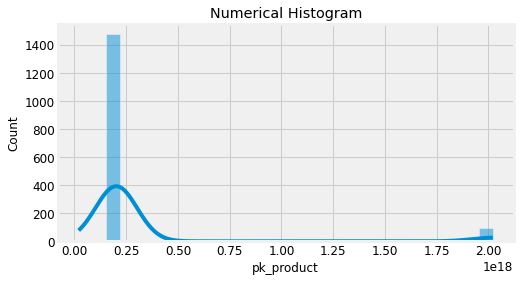

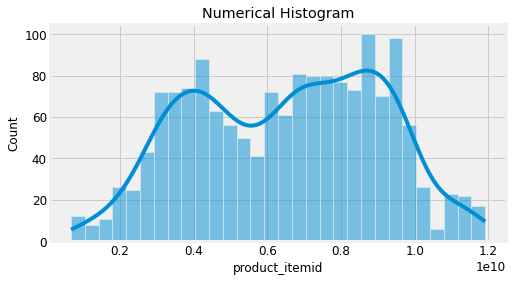

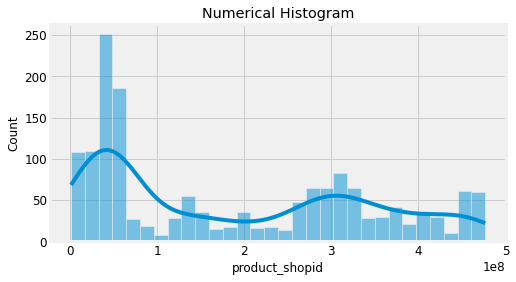

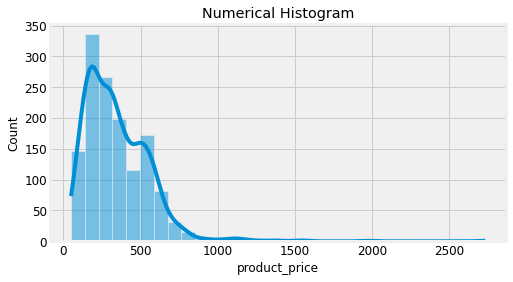

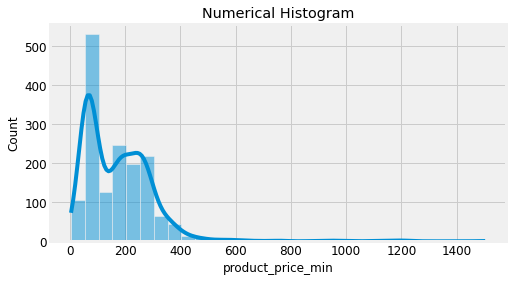

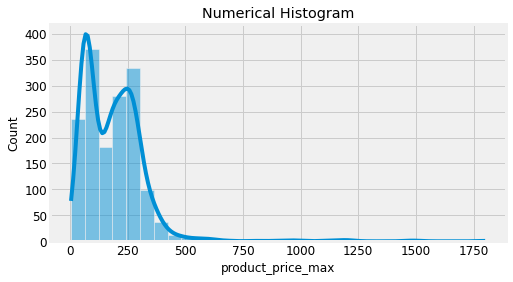

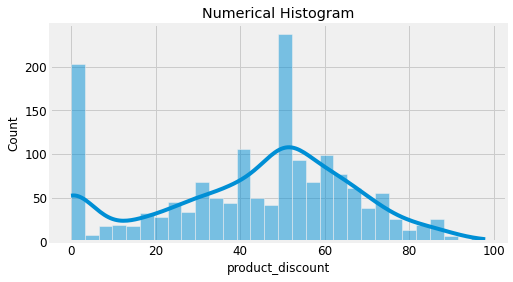

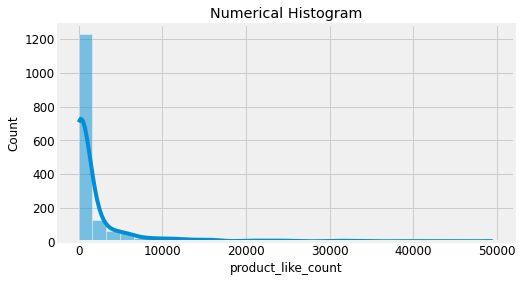

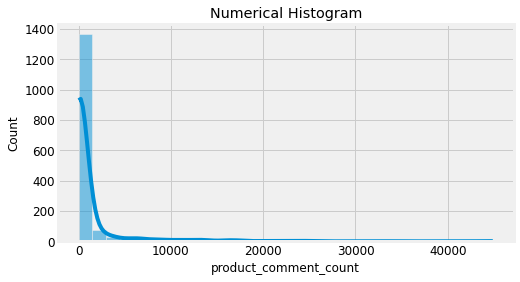

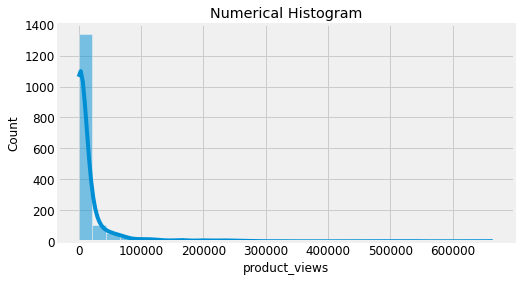

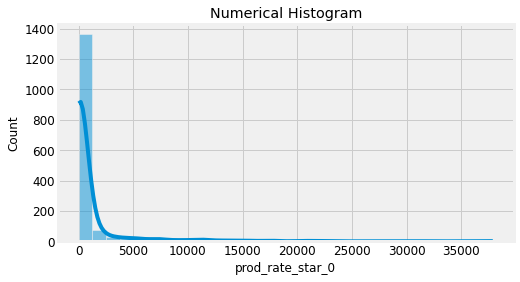

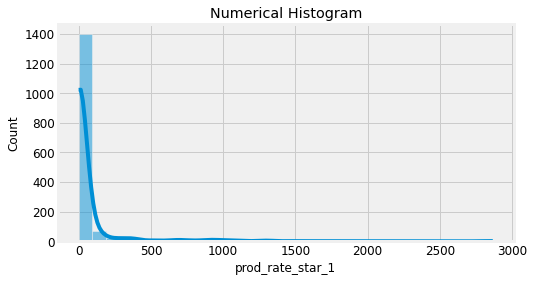

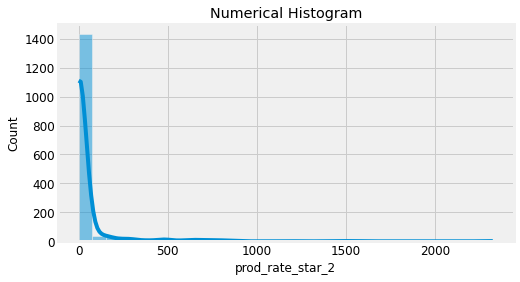

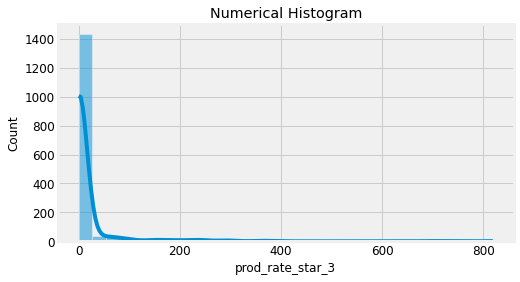

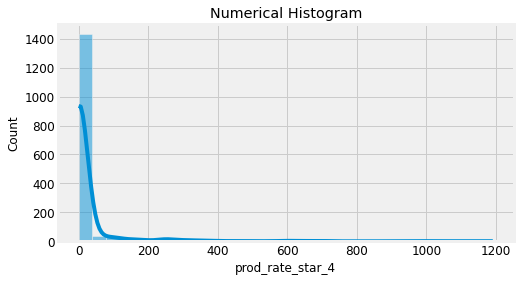

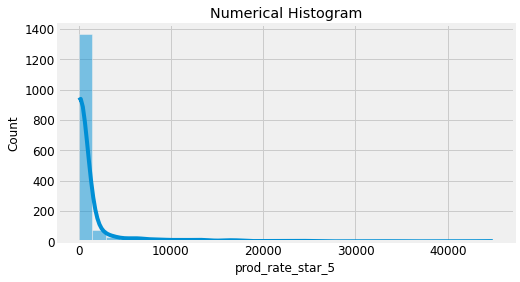

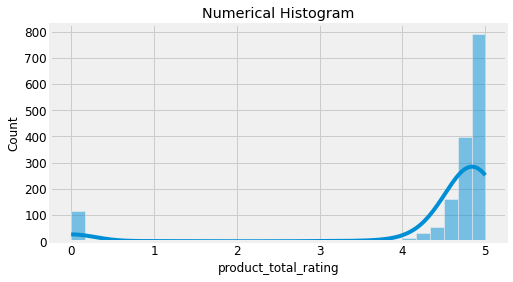

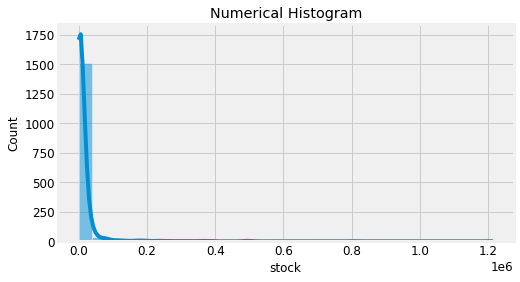

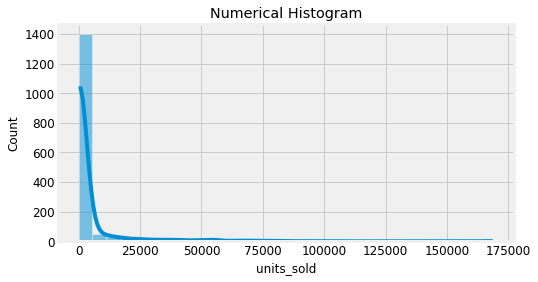

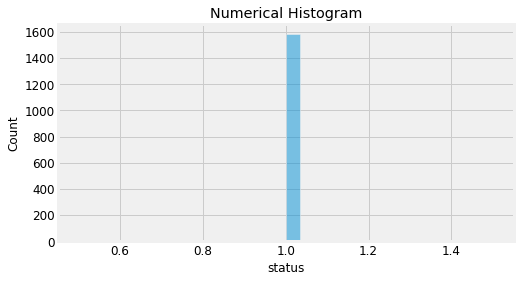

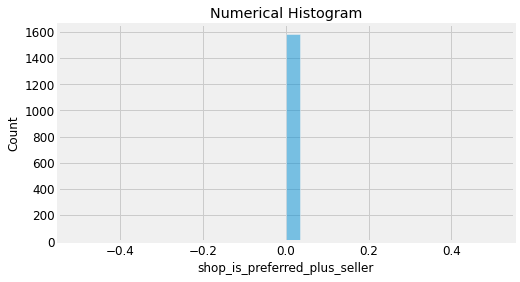

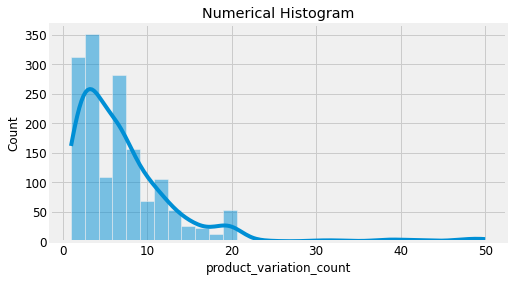

In [ ]:
# tampilkan histogram
for columns in num_col:
  distribution_plots(cp_df,columns)

## 4.2 *Categorical Feature*

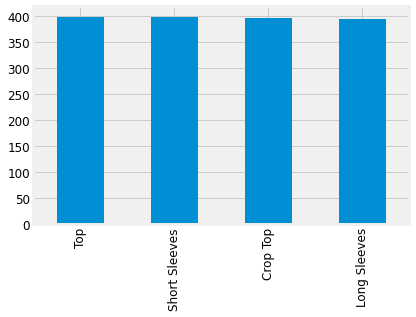

In [ ]:
# tampilkan perbandingan jumlah kategori produk
cp_df['product_category'].value_counts().plot(kind='bar');

---

*Result :*

- Jumlah produk masing-masing kategori memliki jumlah yang balance, hal ini dapat dilihat pada bar plot diatas bahwa semua produk jumlahnya sama
---

## 4.3 *Product Discount and lowest guarantee and rating*

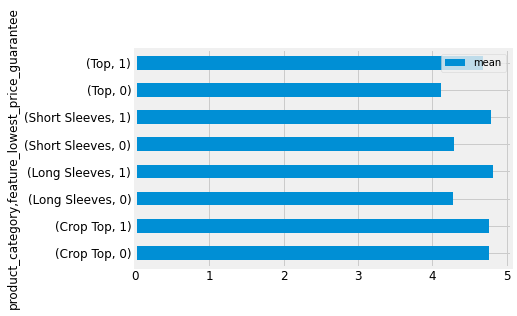

In [ ]:
# Grouping and aggregating
cp_df.groupby(by=['product_category','feature_lowest_price_guarantee']).product_total_rating.agg(["mean"]).plot(kind='barh');

---

*Result :*

- Produk dengan jaminan harga rendah, cenderung memberikan rating minimal bintang 4, yang menandakan jika setiap kategori jika diberikan garansi harga rendah mampu memberikan rating yang baik.
- Low-price strategy biasanya sering diterapkan untuk produk yang baru dijual di marketplace namun hal ini bisa berdampak positif maupun negatif, hal yang positif adalah produk dengan harga lebih rendah biasanya muncul di halaman pencarian terdepan dan produk yang memiliki harga lebih rendah dibandingkan kompetitor biasanya lebih sering dibeli oleh customer karena dengan harga yang murah membuat customer berani untuk mencoba membeli produk tersebut dan dalam dataset ini dapat dibuktikan bahwa customer yang membeli produk yang murah, dapat memaklumi kualitas produk apabila produk yang diterima tidak sesuai dengan ekspektasi. Strategi ini juga memiliki kelemahan yaitu dengan harga yang murah customer mulai mempertanyakan kredibilitas penjual atau kualitas dari produk, biasanya barang dengan harga produksi yang rendah kualitasnya akan berbeda dengan produk yang dijual dengan harga yang lebih mahal

---

## 4.4 *Category by like count*

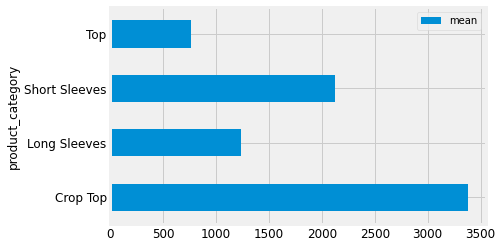

In [ ]:
# Grouping and aggregating
cp_df.groupby(by=['product_category']).product_like_count.agg(["mean"]).plot(kind='barh');

---

*Result :*

- Dari plot diatas dapat dilihat jika kategori produk yang paling disukai oleh konsumen adalah kategori `Crop Top` , dari hasil ini juga dapat disimpulkan jika pada bulan juni baju dengan kategori `Crop Top` sedang banyak calon pembeli.

---

## 4.5 *Top Category*

### *By the views*

In [ ]:
# Grouping Top viewstop_views
top_views = cp_df.groupby(by=['product_category']).sum().round(2)
# Sorting
top_views = top_views.sort_values('product_total_rating', ascending=False).head(20)

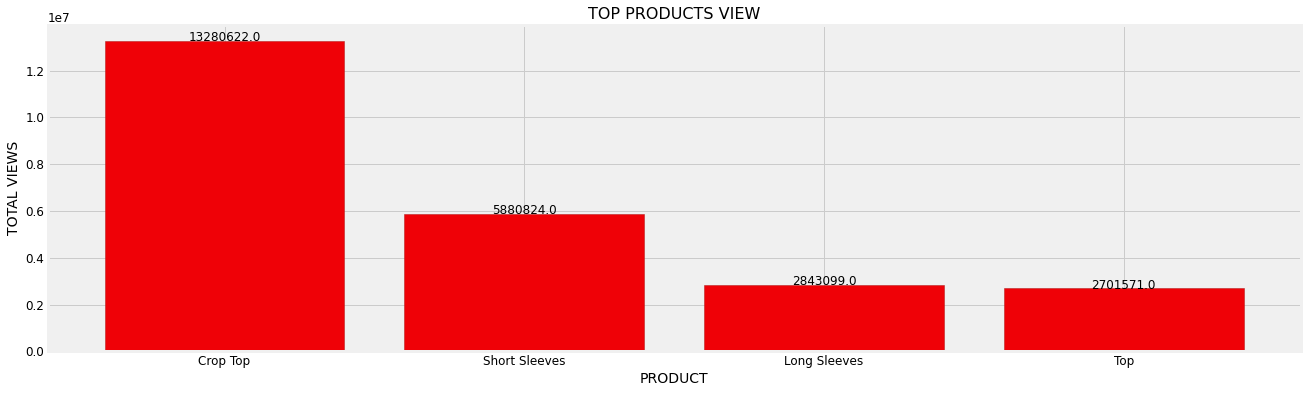

In [ ]:
#plot the top Products with most sales

# Define size
plt.figure(figsize=[20,6])
# Define Bar
plt.bar(top_views.index, top_views.product_views, color='#EF0107', edgecolor='#B31B1B')
# Define Title and label
plt.title("TOP PRODUCTS VIEW", fontsize=16)
plt.xlabel('PRODUCT', fontsize=14)
plt.ylabel('TOTAL VIEWS', fontsize=14)
# Define Text
for i, v in top_views.product_views.items():
    if v>60000:
        plt.text(i, v-15000, s=str(v), color='black', fontsize=12 , horizontalalignment='center')
    else:
        plt.text(i, v+4000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
# Showin Plot    
plt.show()

---

*Result*

- Dari plot diatas dapat disimpulkan jika pelanggan lebih sering melihat produk dengan kategori `Crop Top`, ini semakin memberatkan kesimpulan sebelumnya, jika kategori produk `Crop Top` sedang banyak calon pembeli.

---

### *By the total products sold*

In [ ]:
# Grouping Top viewstop_views
top_sold = cp_df.groupby(by=['product_category']).sum().round(2)
# Sorting
top_sold = top_sold.sort_values('units_sold', ascending=False).head(20)

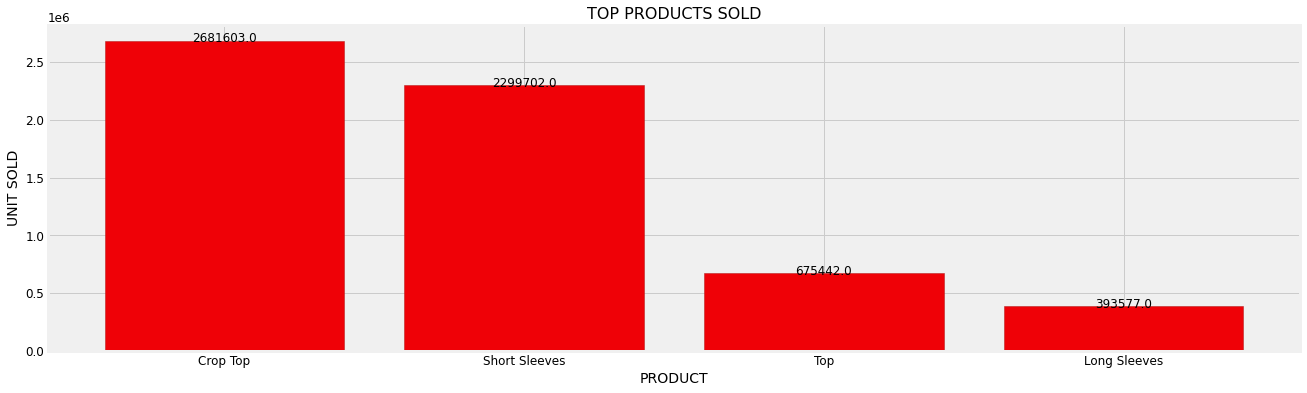

In [ ]:
#plot the top Products with most sales

# Define size
plt.figure(figsize=[20,6])
# Define Bar
plt.bar(top_sold.index, top_sold.units_sold, color='#EF0107', edgecolor='#B31B1B')
# Define Title and label
plt.title("TOP PRODUCTS SOLD", fontsize=16)
plt.xlabel('PRODUCT', fontsize=14)
plt.ylabel('UNIT SOLD', fontsize=14)
# Define Text
for i, v in top_sold.units_sold.items():
    if v>60000:
        plt.text(i, v-15000, s=str(v), color='black', fontsize=12 , horizontalalignment='center')
    else:
        plt.text(i, v+4000, s='$'+str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
# Showin Plot    
plt.show()

---

*Result*

- Dari hasil plot diatas dapat memberikan pembuktian untuk kesimpulan sebelumnya, pada hasil plot kategori produk yang banyak terjual adalah katageori produk `Crop Top`, namun dilihat sekilas pembelian berdasarkan kategori produk, jenis `Crop Top` tidak memiliki perbedaan yang jauh seperti hasil sebelumnya, jika dari hasil berdasarkan `Like` dan `View` kategori berjenis `Crop Top` dan `Short Sleeves` memiliki perbedaan yang sangat jauh, tetapi berdasarkan hasil produk yang terjual perbedaan nya tidak terlalu jauh, maka dari hal ini dapat disimpulkan jika kemungkinan `Crop Top` memang banyak peminat nya , namun `Short Sleeves` adalah pilihan alternatifnya.

---

## 4.6 *Top Product*

### *By the views*

In [ ]:
# Grouping Top viewstop_views
top_product_views = cp_df.groupby(by=['product_name']).sum().round(2)
# Sorting
top_product_views = top_product_views.sort_values('product_total_rating', ascending=False).head(20)

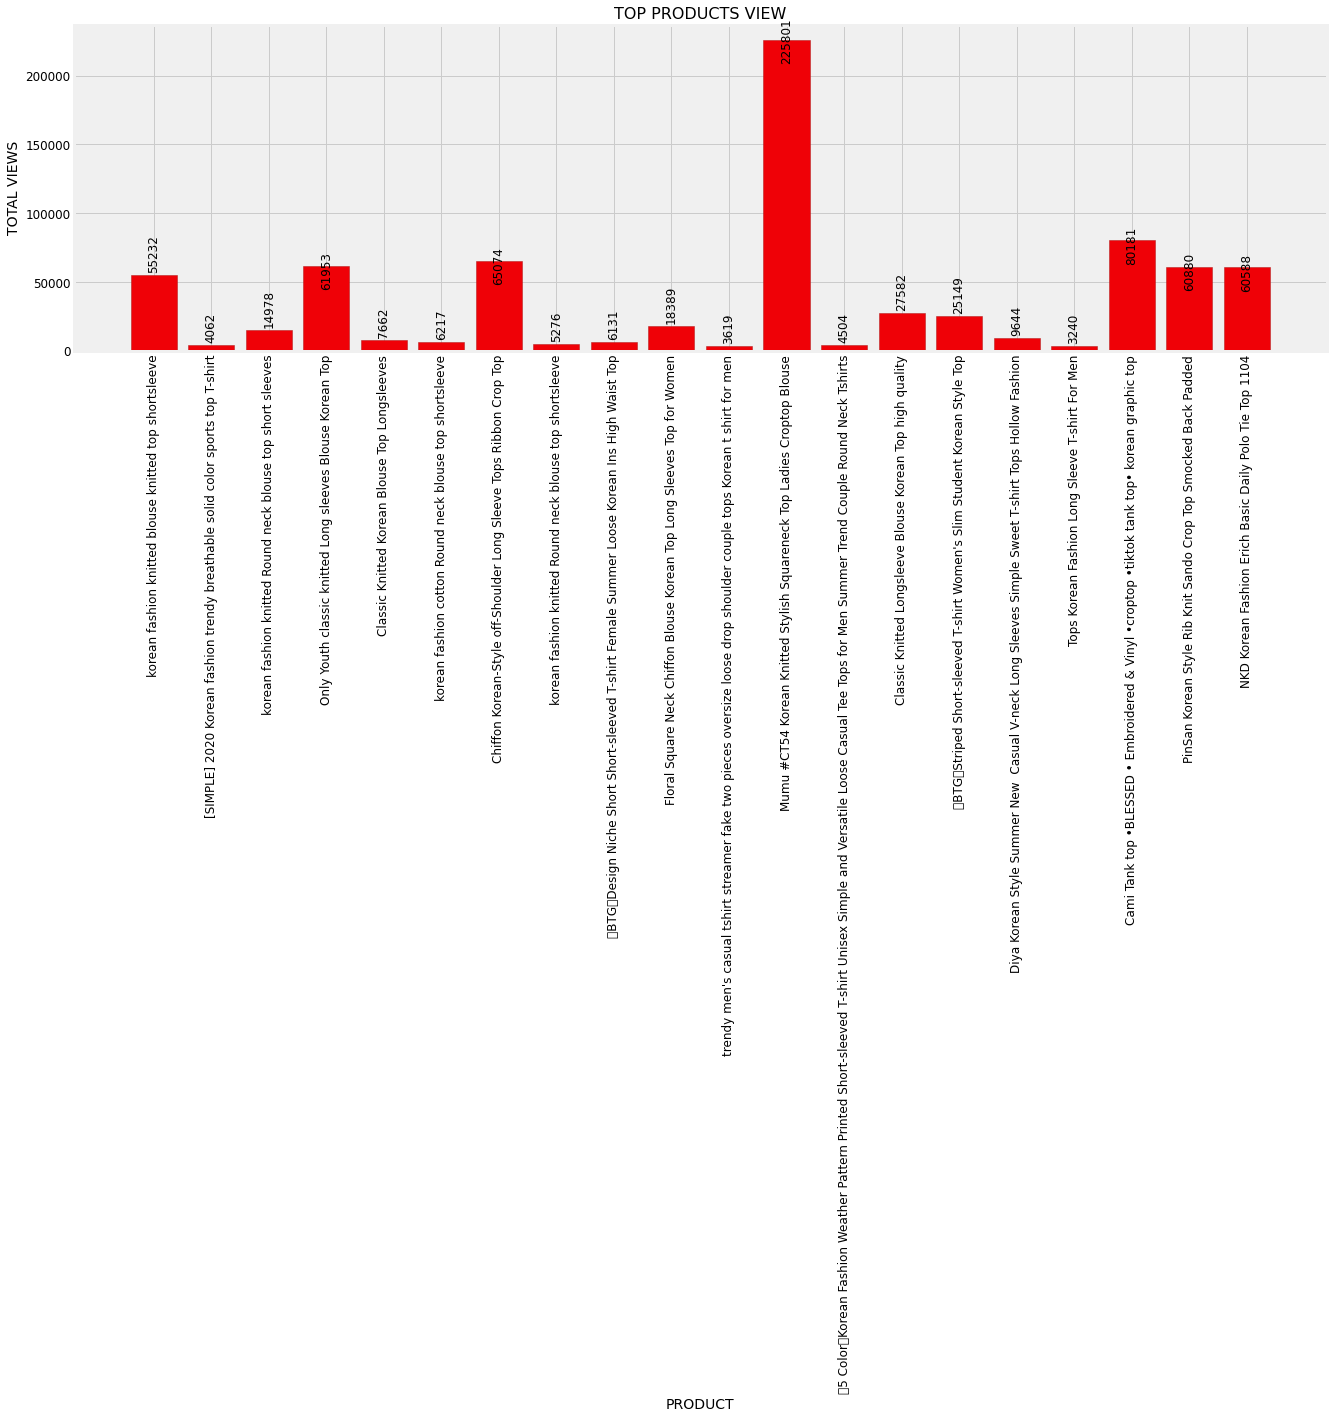

In [ ]:
#plot the top Products with most sales

# Define size
plt.figure(figsize=[20,6])
# Define Bar
plt.bar(top_product_views.index, top_product_views.product_views, color='#EF0107', edgecolor='#B31B1B')
# Define font rotation
plt.xticks(rotation=90)
# Define Title and label
plt.title("TOP PRODUCTS VIEW", fontsize=16)
plt.xlabel('PRODUCT', fontsize=14)
plt.ylabel('TOTAL VIEWS', fontsize=14)
# Define Text
for i, v in top_product_views.product_views.items():
    if v>60000:
        plt.text(i, v-15000, s=str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+4000, s=str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
# Showin Plot    
plt.show()

---
*Result*

- Plot diatas memberikan informasi tentang 20 produk teratas yang sering dilihat oleh pelanggan, dan yang menjadi teratas dari semuanya adalah produk dengan nama `Mumu CT54 Korean Knitted Stylish Squareneck Top Ladies CropTop Blues`, dan dari produk lain produk ini berkali-kali lipat lebih tinggi `views` nya ketimbang produk yang lain.

---

### *By the total products sold*

In [ ]:
# Grouping Top viewstop_views
product_name_sold = cp_df.groupby(by=['product_name']).sum().round(2)
# Sorting
product_name_sold = product_name_sold.sort_values('units_sold', ascending=False).head(20)

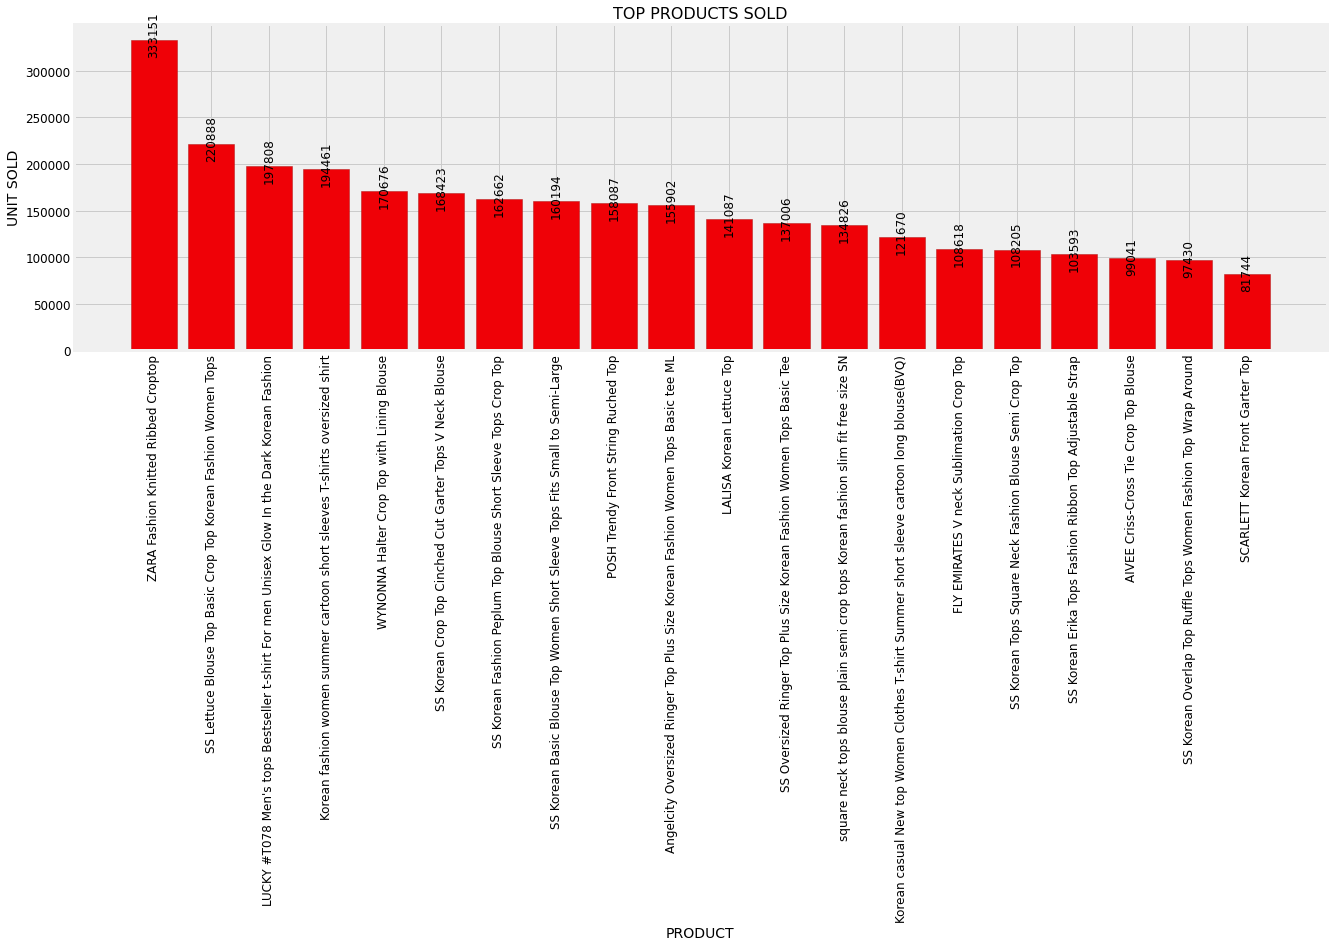

In [ ]:
#plot the top Products with most sales

# Define size
plt.figure(figsize=[20,6])
# Define Bar
plt.bar(product_name_sold.index, product_name_sold.units_sold, color='#EF0107', edgecolor='#B31B1B')
# Define font rotation
plt.xticks(rotation=90)
# Define Title and label
plt.title("TOP PRODUCTS SOLD", fontsize=16)
plt.xlabel('PRODUCT', fontsize=14)
plt.ylabel('UNIT SOLD', fontsize=14)
# Define Text
for i, v in product_name_sold.units_sold.items():
    if v>60000:
        plt.text(i, v-15000, s=str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
    else:
        plt.text(i, v+4000, s=str(v), color='black', fontsize=12 ,rotation=90, horizontalalignment='center')
# Showin Plot    
plt.show()

---

*Result*

- Plot diatas memberikan informasi tentang 20 produk teratas yang sudah terjual, dari hasil diatas tidak ada produk dengan nama `Mumu CT54 Korean Knitted Stylish Squareneck Top Ladies CropTop Blues` yang menandakan banyak nya view belum tentu mendatangkan pelanggan untuk membeli produknya.

---

## 4.7 Kesimpulan keseluruhan EDA

1. Kategori produk yang paling diminati oleh pelanggan, adalah kategori produk `Crop Top` , hal ini dibuktikan dari banyaknya view , like,dan produk yang terjual.

2. Produk dari view banyak belum tentu memberikan minat pelanggan untuk membeli, hal ini dibuktikan dengan adanya produk dengan jumlah total view tertinggi, tidak tercantum pada produk dengan penjualan tertinggi.

3. Dengan memberikan garansi harga rendah cenderung membuat pelanggan memberikan rating yang tinggi, dan kemungkinan perbedaan yang terjadi pada perbedaan sebelumnya itu diakibatkan merchant tidak memberikan jaminan harga rendah pada produk yang dijualnya, atau produk nya tidak memiliki rating yang tinggi.

4. Dari ketiga hal diatas, maka kami akan merekomendasikan produk berdasarkan rating, dan dengan merekomendasikan barang berdasarkan rating, itu bisa memberikan merchant lain yang baru saja hadir dapat bersaing dengan merchant lainya dan tidak saling mematikan merchant lainya, walaupun hanya memiliki pembeli,like dan view yang sedikit tetapi produk masih dapat bersaing.

## 4.8 Marketing Reconsideration


1. Free shipping memiliki daya tarik khusus atau spesial dalam menarik perhatian pembeli baru dalam marketing strategy free shipping adalah strategi yang mengimplementasikan "zero price effect" dan berdasarkan Deloitte holiday retail survey 2020 customer lebih memprioritaskan untuk berbelanja dengan layanan free shipping (85%) dibandingkan fast shipping (15%) calon pembeli biasanya juga rentan untuk melakukan cancel purchase apabila terdapat additional cost saat checkout seperti biaya admin, biaya platform, dsb. oleh karena itu free shipping berdampak untuk memberikan dorongan kepada calon customer untuk segera checkout pesanannya dan saat ini melihat kebiasaan berbelanja di Indonesia free shipping menjadi salah satu kebutuhan utama pembeli saat melakukan checkout pesanan
2. Flash sale biasanya digunakan sebagai alat promosi produk secara musiman atau sebagai periode bagi penjual untuk menghabiskan stok produk lama namun strategy flash sale juga mempunyai peran penting yaitu untuk meningkatkan frekuensi penjualan, mempertahankan traffic customer atau follower toko, dan juga membuat brand produk lebih dikenal oleh calon calon pembeli baru
3. Product Bundling biasanya digunakan untuk mengurangi jumlah produk sisa, atau biasanya produk yang kurang laris dibundling dengan produk best selling dengan harga yang lebih murah dibandingkan membeli satuan, strategy bundling membuat produk yang kurang laris trafficnya terdongkrak oleh produk best seller. Dalam bidang Fashion biasanya ada produk yang memang didesain atau dibuat dalam satu paket agar customer tidak bingung dalam menentukan mode pakaian. Keuntungan product bundling antara lain meningkatkan average checkout basket, meningkatkan volume penjualan, menghemat biaya packing dan meningkatkan pengalaman berbelanja customer 
4. Wholesale adalah strategy penjualan yang biasanya diterapkan oleh perusahaan B2B dimana barang yang dijual dalam kuantitas banyak dengan rate harga yang lebih rendah dibandingkan menjual satuan namun dalam industri Fashion strategy ini kurang disarankan apabila penjual menerapkan strategy penjualan DTC(Direct to Consumer) karena wholesale ini biasanya marak digunakan untuk menjual barang barang kebutuhan primer maupun sekunder namun untuk barang barang fashion yang bersifat tersier strategy ini dapat mengurangi tingkat eksklusif dari barang yang dijual, untuk pasar Indonesia biasanya perusahaan yang menerapkan strategy ini mempunyai tujuan untuk membentuk jaringan distributor atau menarik para reseller/dropshipper




# **5. Data Preprocessing**

untuk membuat model collaborative filtering menggunakan dataset customer dan rating yaitu cr_df

In [ ]:
# rename kolom
cr_df.rename(columns = {'itemid':'product_itemid'}, inplace = True)

In [ ]:
# drop kolom yang tidak diperlukan
cr_df = cr_df.drop(['pk_review', 'shopid','author_username', 'comment', 'no_tag', 'pos_good_quality',
                    'pos_excellent_quality', 'pos_very_accomodating', 'pos_well_packaged',
                    'pos_item_shipped_immediately', 'pos_will_order_again', 'neg_defective',
                    'neg_did_not_receive_item', 'neg_damaged_packaging', 'neg_will_not_order_again',
                    'neg_rude_seller', 'neg_item_shipped_late', 'neg_item_different_from_picture', 'date_collected'], axis =1)

In [ ]:
# tampilkan dataset
cr_df

,cmtid,product_itemid,rating_star
0,4996449880,3550379942,5
1,5025745783,3550379942,5
2,4994515949,3550379942,5
3,5006142740,3550379942,5
4,4927077288,3550379942,5
...,...,...,...
51274,5243254409,2768006775,5
51275,5159784210,2768006775,5
51276,5109679941,2768006775,5
51277,5161399466,2768006775,5


Karena id untuk customer dan produk memiliki nilai yang tinggi dan dapat mengakibatkan crash pada saat melakukan permodelan maka akan dilakukan factorize untuk mengubah 'label' dari id customer dan produk tetapi tidak mengubah dari nilai yang sebenarnya.

In [ ]:
# sort value berdasarkan id customer
cr_df.sort_values(by=['cmtid'])

,cmtid,product_itemid,rating_star
39696,2203262802,1815078583,5
39227,2218293503,2854385365,5
19761,2223164056,3301626610,5
45794,2223164056,3301626610,5
20563,2274556998,1520716615,5
...,...,...,...
41088,5286223490,8730004617,5
49557,5286252089,8964911458,1
47290,5286335161,4779391354,5
49483,5286335826,8061220194,5


In [ ]:
# factorize id pada customer dan produk
cr_df['cmtid'] = pd.factorize(cr_df['cmtid'])[0]
cr_df['product_itemid'] = pd.factorize(cr_df['product_itemid'])[0]
cp_df['product_itemid'] = pd.factorize(cp_df['product_itemid'])[0]

In [ ]:
# tampilkan dataset setelah factorize
cr_df.head()

,cmtid,product_itemid,rating_star
0,0,0,5
1,1,0,5
2,2,0,5
3,3,0,5
4,4,0,5


## 5.1 Split Dataset

Split dataset menjadi tiga data yaitu train, val dan test.
-  Train digunakan dalam melakukan training model atau sebagai bahan pembelajaran model
- Val digunakan dalam menvalidasi data train telah berada pada rentang nilai yang seharusnya atau mengecek terjadinya overfitting dan underfitting
- Test digunakan untuk melakukan evaluasi dari model yang telah dibuat

In [ ]:
# split data train dan test
train, test = train_test_split(cr_df, test_size=0.1, random_state=23)
# split data train dan validation
train, val = train_test_split(cr_df, train_size=0.9,random_state=23)

In [ ]:
#tampilkan size masing-masing
print('Size train:', train.shape)
print('Size validation:', val.shape)
print('Size test:', test.shape)

Size train: (46151, 3)
Size validation: (5128, 3)
Size test: (5128, 3)


Definisikan y train, val dan test

In [ ]:
# definsikan y
y_train = (train['rating_star'] - cr_df['rating_star'].min()) / (cr_df['rating_star'].max() - cr_df['rating_star'].min())
y_val = (val['rating_star'] - cr_df['rating_star'].min()) / (cr_df['rating_star'].max() - cr_df['rating_star'].min())
y_test = (test['rating_star'] - cr_df['rating_star'].min()) / (cr_df['rating_star'].max() - cr_df['rating_star'].min())

## 5.2 Data Cleaning

Pertama, lakukan cek missing value pada masing-masing data

In [ ]:
# cek missing value train
train.isnull().sum()

cmtid             0
product_itemid    0
rating_star       0
dtype: int64

In [ ]:
# cek missing value val
val.isnull().sum()

cmtid             0
product_itemid    0
rating_star       0
dtype: int64

In [ ]:
# cek missing value test
test.isnull().sum()

cmtid             0
product_itemid    0
rating_star       0
dtype: int64

- Dari hasil yang diperoleh bahwa dataset tidak terdapat missing value

Kedua, cek outliers

In [ ]:
# buat fungsi untuk cek outliers berupa histogram dan boxplot
def diagnostic_plots(train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=train[variable])
    plt.title('Boxplot')

    plt.show()

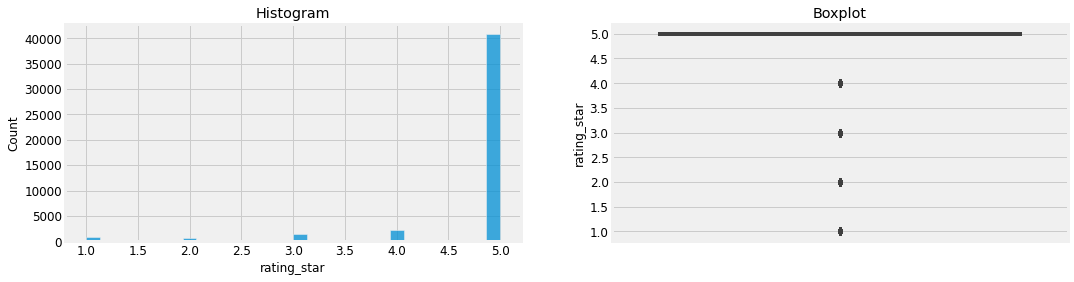


Skewness Value :  -3.619819433798819


In [ ]:
# tampilkan histogram dan boxplot kolom rating_star
diagnostic_plots(train, 'rating_star')
print('\nSkewness Value : ', train['rating_star'].skew())

- Outlier ditemukan dibagian left end sehingga kami asumsikan rating yang akan dihilangkan adalah rating rendah (1-3) untuk tidak perlu dilakukan handling karena rating rendah masih kami butuhkan untuk analisis data

# **6. Build Model**

## 6.1 Model definition

Pertama definisikan demensi input pada layer embedding

In [ ]:
# produk
dim_product = cr_df['product_itemid'].max()+1
#customer
dim_customer = cr_df['cmtid'].max()+1

Definisikan model dengan menggunakan function API karena akan dilakukan perkalian dot produk antara produk dan customer untuk memperoleh similarity

In [ ]:
# Prodct layer
# input layer
product_input = Input(shape=(1,), name="Product-Input")
# embedding layer
product_embedding = Embedding(dim_product, 50, embeddings_initializer="he_normal",
                              embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                              name="Product-Embedding")(product_input)
# flatten layer
product_flatten = Flatten(name="Product-Flatten")(product_embedding)

# customer layer
#input layer
customer_input = Input(shape=(1,), name="Customer-Input")
# embedding layer
customer_embedding = Embedding(dim_customer, 50,embeddings_initializer="he_normal",
                               embeddings_regularizer=tf.keras.regularizers.l2(1e-6), 
                               name="Customer-Embedding")(customer_input)
# flatten layer
customer_flatten = Flatten(name="Customer-Flatten")(customer_embedding)

# layer dot product
prod = Dot(name="Dot-Product", axes=1)([product_flatten, customer_flatten])

# output layer
dense = Dense(1, activation='relu')(prod)

# definisikan model
model = Model([customer_input, product_input], dense)

In [ ]:
# compile model
model.compile(loss='mean_squared_error',
              metrics=['accuracy'],
              optimizer='adam')

In [ ]:
# model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Product-Input (InputLayer)     [(None, 1)]          0           []                               
                                                                                                  
 Customer-Input (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Product-Embedding (Embedding)  (None, 1, 50)        47500       ['Product-Input[0][0]']          
                                                                                                  
 Customer-Embedding (Embedding)  (None, 1, 50)       1678200     ['Customer-Input[0][0]']         
                                                                                              

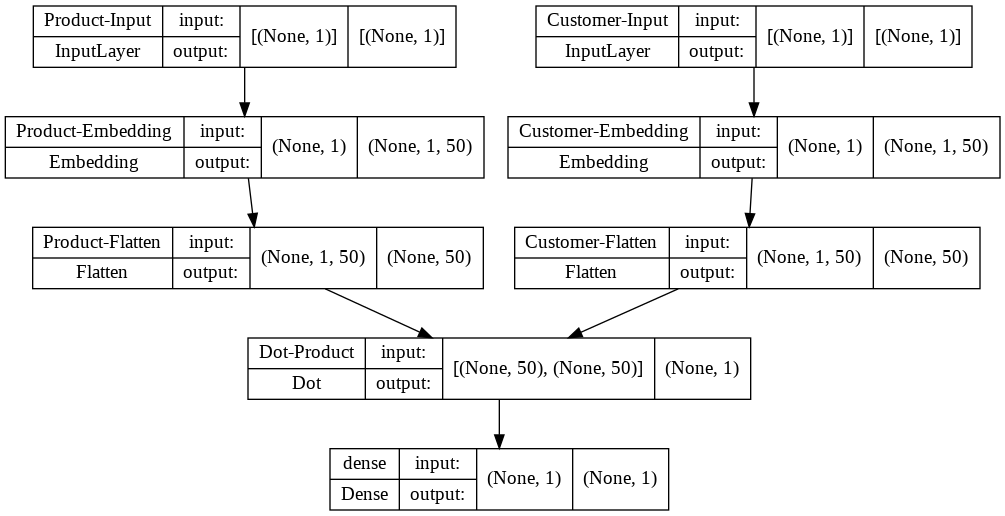

In [ ]:
# visualisasi proses model
tf.keras.utils.plot_model(model, show_shapes=True)

## 6.2 Model Training

Definsikan callback berupa earlystoping dan modelcheckpoint.
- Early stopping digunakan untuk menghentikan training jika val_loss tidak ada peningkatan
- Model check point digunakan untuk menyimpan model terbaik dengan monitoring dari nilai akurasi terbaik

In [ ]:
# callbacks
callbacks= [
            EarlyStopping(monitor= 'val_loss', mode='min', patience= 3, verbose=1),
            ModelCheckpoint('model_best.hdf5', monitor='accuracy', save_best_only= True)
]

Lakukan training model menggunakan model yang telah dibuat

In [ ]:
# training model
history = model.fit(x = [train['cmtid'].values, train['product_itemid'].values], y = y_train.values,
                    validation_data=([val['cmtid'].values, val['product_itemid'].values], y_val.values),
                    batch_size=128, 
                    epochs=50, 
                    verbose=1,
                    callbacks=callbacks)

Epoch 1/50
361/361 [==============================] - 12s 28ms/step - loss: 0.5949 - accuracy: 0.0593 - val_loss: 0.2907 - val_accuracy: 0.3009
Epoch 2/50
361/361 [==============================] - 8s 21ms/step - loss: 0.0963 - accuracy: 0.7858 - val_loss: 0.1313 - val_accuracy: 0.5199
Epoch 3/50
361/361 [==============================] - 7s 21ms/step - loss: 0.0090 - accuracy: 0.9033 - val_loss: 0.1275 - val_accuracy: 0.5199
Epoch 4/50
361/361 [==============================] - 7s 21ms/step - loss: 0.0062 - accuracy: 0.9035 - val_loss: 0.1231 - val_accuracy: 0.5199
Epoch 5/50
361/361 [==============================] - 7s 20ms/step - loss: 0.0057 - accuracy: 0.9035 - val_loss: 0.1209 - val_accuracy: 0.5199
Epoch 6/50
361/361 [==============================] - 9s 24ms/step - loss: 0.0072 - accuracy: 0.9035 - val_loss: 0.1166 - val_accuracy: 0.5199
Epoch 7/50
361/361 [==============================] - 7s 20ms/step - loss: 0.0093 - accuracy: 0.9035 - val_loss: 0.1097 - val_accuracy: 0.519

Visualisasikan hasil loss dan akurasi dari training model agar dapat diketahui perfoma model dari hasil training.

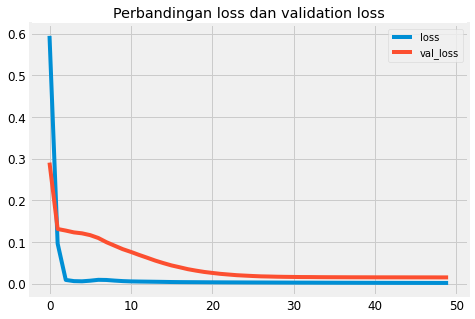

In [ ]:
# ubah ke dataframe
metrics_model = pd.DataFrame(history.history)

# plot loss dan validation loss
metrics_model[['loss', 'val_loss']].plot(figsize=(7,5))
plt.title('Perbandingan loss dan validation loss')
plt.show()

Jarak antara loss dan validation loss mulai hilang di epoch 30, train loss (loss) mengindikasi seberapa bagus model fit dengan train data, sedangkan validation loss (val_loss) mengindikasi seberapa bagus model fit dengan data yang baru, dapat kami simpulkan di epoch 30 model yang dibuat sudah fit dengan baik dengan data

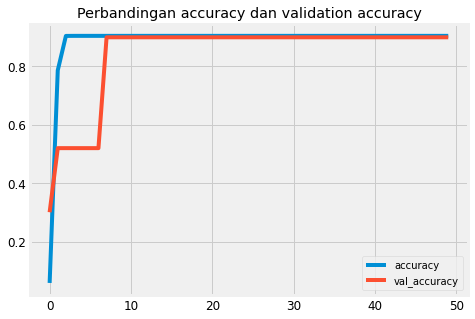

In [ ]:
# plot accuracy dan val_accuracy
metrics_model[['accuracy', 'val_accuracy']].plot(figsize=(7,5))
plt.title('Perbandingan accuracy dan validation accuracy')
plt.show()

Jarak antara accuracy dengan val_accuracy menghilang di epoch +- 6, tingkat accuracy model setelah epoch 6 atau percobaan ke 6 menjadi constant di angkat 0.9 menandakan keakuratan data train dengan data validasi akurat 90% dan tidak ada gejala model overfit maupun underfit, hal ini juga mungkin disebabkan oleh data set yang sedikit

## 6.3 Model Evaluation

Lakukan prediksi terhadap data test dan lakukan hasil evaluasi berdasarkan metric untuk pengukuran regresi

In [ ]:
# prediksi data train
y_pred = model.predict([test['cmtid'].values, test['product_itemid'].values])

Cek hasil dari MSE, RMSE dan R2score

In [ ]:
# Evaluasi model menggunakan MSE
print('MSE = ', mean_squared_error(y_test, y_pred))

# Evaluasi model menggunakan RMSE
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

# Evaluasi model menggunakan R2score
print('r2score = ', r2_score(y_test, y_pred))

MSE =  0.014189761694289156
RMSE =  0.11912078615543618
r2score =  0.5311268856606166


1. Mean Squared Error (MSE) berperan sebagai estimator atau menhitung rata-rata error kuadrat, MSE selalu bersifat angka positif, semakin dekat MSE dengan angka 0, berarti semakin sedikit error yang didapatkan dari model tersebut. ()

2. Root Mean Square Error (RMSE) adalah akar kuadrat dari MSE yang mempunyai peran untuk mengukur/menghitung jarak penyebaran antara nilai yang di prediksi dengan nilai aktual model

3. Coefficient of Determination or R2 (R Squared) berperan untuk mengukur bagaimana tingkat data prediksi mengestimasi data aktualnya, R2 score tidak bisa kurang dari angka 0, semakin tinggi r2 score atau semakin dekat dengan angka 1 berarti model yang dibuat adalah good fit


# **7. Model Inference**

Lakukan prediksi produk yang diberikan rating tinggi dan rekomendasi 5 produk untuk customer 23

In [ ]:
# dari 100 produk random
num_product= 100

# gruopby berdasarkan produk
product_list = cr_df.groupby('product_itemid').count().sort_values('cmtid',ascending=False).index[:num_product]
customer_23 = np.array([23 for i in range(len(product_list))])

# prediksi rating
prediksi = model.predict([customer_23, product_list]).reshape(num_product)

# menampilkan top 5 produk
top_5_ids = (-prediksi).argsort()[:5]
top_5_product_id = product_list[top_5_ids]
top_5_product_rating = prediksi[top_5_ids]*(cr_df['rating_star'].max() - cr_df['rating_star'].min()) + cr_df['rating_star'].min()

Definisikan produk yang disukai dan rekomendasi produk

In [ ]:
liked_products_customer_23 = cr_df[cr_df['cmtid']==23].sort_values('rating_star',ascending=False).product_itemid[:5].values
customer_rating = cr_df[cr_df['cmtid']==23].sort_values('rating_star',ascending=False).rating_star[:5].values

In [ ]:
# produk yang disukai customer
print("Produk yang disukai oleh customer 23")
for i,id in enumerate(liked_products_customer_23):
  print('{}\nRating: {}'.format(cp_df['product_name'].loc[id],customer_rating[i]))

Produk yang disukai oleh customer 23
NKD Korean Fashion Erich Basic Daily Polo Tie Top 1104
Rating: 5
NKD Korean Fashion Erich Basic Daily Polo Tie Top 1104
Rating: 5


In [ ]:
# rekomendasi produk untuk customer 23
print('Rekomendasi produk untuk customer 23:\n')
for i,id in enumerate(top_5_product_id):
  print('{}\nrating: {:.0f}'.format(cp_df['product_name'].loc[id],top_5_product_rating[i]))

Rekomendasi produk untuk customer 23:

Women Puff Off Shoulder Smocked Tops Plaid Square Collar Sweet Exposed Navel Casual Short Sleeve Crop Blouse korean top
rating: 5
SS Korean Tops Square Neck Fashion Blouse Semi Crop Top
rating: 5
【lgoh.ph】New Fashion Lace Puff  Long Sleeve Smocked Tops For Women
rating: 5
Korean Top Harajuku Long Sleeve Shirt for Women Trendy Tops Loose Shirt for Women T-Shirt for Women Ulzzang Tops Fashion Casual Tops Women Loose Tshirt Round Neck T Shirts Women Clothes
rating: 5
DNEMNLPH Fiona Vintage Puff Top (Trendy Korean Inspired Fashion Best Seller)
rating: 5


- Customer 23 telah membeli barang dengan kategori Top dan memberikan rating 5, Jadi produk yang akan direkomendasikan berasal dari kategori yang sama yaitu Top tetapi dengan model ataupun bahan yang berbeda.

# **Referensi**

- Dataset : https://www.kaggle.com/datasets/jaepin/shopeeph-koreantop-clothing
- https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce
- https://levitrares.com/host-https-medium.com/sysinfo/sistem-rekomendasi-1eeb635e272f
- https://scholarworks.uark.edu/cgi/viewcontent.cgi?referer=&httpsredir=1&article=2262&context=etd#:~:text=User%2Dbased%20collaborative%20recommender%20systems,similar%20items%20in%20the%20past.
- https://colab.research.google.com/drive/11IbmXTOu1n7f0T2dV0vemuvwnvyI6JxG?usp=sharing#scrollTo=shQPMd0wOz6u
- https://www.perzonalization.com/blog/product-recommendation-engines/
- https://towardsdatascience.com/comprehensive-guide-on-item-based-recommendation-systems-d67e40e2b75d
- https://roojet.com/pros-and-cons-of-using-low-price-strategy-in-ecommerce/
- https://360creativehub.com/flash-sale-the-pros-the-cons-and-everything-in-between/
- https://medium.com/@Marty.JL/the-consumer-psychology-behind-free-shipping-in-online-retail-81cc6dc20f7
- https://sendpulse.com/support/glossary/product-bundling
- https://squareup.com/us/en/townsquare/dtc-vs-wholesale-retail